In [128]:
from collections import OrderedDict
import matplotlib.pyplot as plt
import numpy as np
from copy import copy

In [154]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

def adaptive_hist_eq(img):
    
    n = len(img[0])
    m = len(img[:,0])
    
    final_img = copy(img)
    pixel_freq = {}
    pdf = {}
    cdf = {}
    pixel_count = n * m    
    
    for i in range(n):
        for j in range(m):
            pixel_val = img[i, j]
            if pixel_val in pixel_freq:
                pixel_freq[pixel_val] += 1
            else:
                pixel_freq[pixel_val] = 1
                
                
    for pixel_val, freq in pixel_freq.items():
        pdf[pixel_val] = freq / pixel_count
        
    pdf = OrderedDict(sorted(pdf.items(), key=lambda t: t[0]))
    
    prev = 0
    for pixel_val, prob in pdf.items():
        cdf[pixel_val] = prev + pdf[pixel_val]
        prev = cdf[pixel_val]
        cdf[pixel_val] = round(cdf[pixel_val] * 250)
        
    for i in range(n):
        for j in range(m):
            final_img[i, j] = cdf[img[i, j]]
    
    return final_img

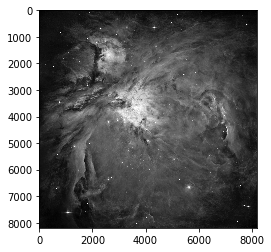

In [155]:
img = plt.imread("test_image6.jpg")
gray = rgb2gray(img)
clean_image = np.matrix.round(gray)
plt.imshow(clean_image, cmap=plt.get_cmap('gray'))
plt.show()

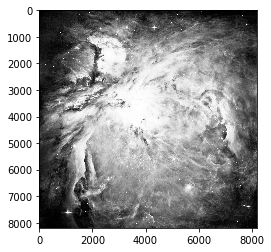

In [124]:
plt.imshow(adaptive_hist_eq(clean_image), cmap=plt.get_cmap('gray'))
plt.show()

In [160]:
p_size = int(8192/4)
partitions = int(8192/p_size)
worker_results = []
for i in range(partitions):
    for j in range(partitions):
        temp = adaptive_hist_eq(clean_image[p_size*i:p_size*(i+1), p_size*j:p_size*(j+1)])
        clean_image[p_size*i:p_size*(i+1), p_size*j:p_size*(j+1)] = temp

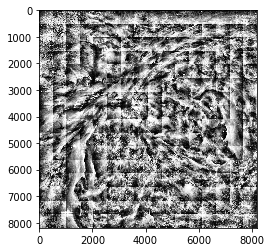

In [161]:
plt.imshow(clean_image, cmap=plt.get_cmap('gray'))
plt.show()